# HDF5 Investigation

This was mainly created to experiment with reading `.h5` files. The most insightful finding apart from learning how to use `h5py` was about overhead with resizing the dataset which is what the last cell is concerned with

In [2]:
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
from scipy import stats

temperature, <HDF5 dataset "temperature": shape (10000,), type "<f8">
<class 'str'>, <class 'h5py._hl.dataset.Dataset'>
----------------------------
timestamp, <HDF5 dataset "timestamp": shape (10000,), type "<i8">
<class 'str'>, <class 'h5py._hl.dataset.Dataset'>
----------------------------
1434.3737373737374


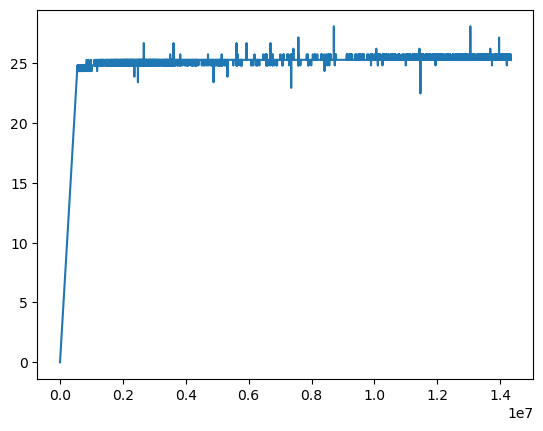

In [3]:
f = h5py.File('../../HDF5_const_size/temp_data_10000_entries_190225_18;06;37.h5','r')
wha = f.keys()
for key, val in f.items():
    print(f"{key}, {val}")
    print(f"{type(key)}, {type(val)}")
    print("----------------------------")
timestamps = f["timestamp"][:]
temperatures = f["temperature"][:]
print(np.mean(np.diff(timestamps)))
plt.plot(timestamps, temperatures)

In [ ]:
folders = {
    "HDF5_const_size": "const_size",
    "HDF5_resize": "resize"
}

all_data = []

for folder, category in folders.items():
    folder_path = f"../../{folder}"

    for file in os.listdir(folder_path):
        if file.endswith(".h5"):
            filepath = os.path.join(folder_path, file)
            with h5py.File(filepath, 'r') as f:
                timestamps = f["timestamp"][:]
                time_diffs = np.diff(timestamps)
                all_data.extend([(category, td) for td in time_diffs]) # Adds list elements to end of this list

# I LOVE PANDAS SORRY :)
df_time_diffs = pd.DataFrame(all_data, columns=["Category", "Time Difference (µs)"])
display(df_time_diffs)

for category in df_time_diffs["Category"].unique():
    subset = df_time_diffs[df_time_diffs["Category"] == category]["Time Difference (µs)"]
    print(f"{category}: Mean = {subset.mean():.2f} ± {stats.sem(subset):.2f} µs")

plt.figure(figsize=(10, 6))
sns.histplot(df_time_diffs, x="Time Difference (µs)", hue="Category", bins=30, kde=True, alpha=0.6)
plt.title("Histogram of Time Difference between Readings")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")

plt.tight_layout()


,Category,Time Difference (µs)
0,const_size,1480033694
1,const_size,1619
2,const_size,1625
3,const_size,1620
4,const_size,1618
...,...,...
2089957,resize,1620
2089958,resize,1620
2089959,resize,1626
2089960,resize,1622


'\nfor category in df_time_diffs["Category"].unique():\n    subset = df_time_diffs[df_time_diffs["Category"] == category]["Time Difference (µs)"]\n    print(f"{category}: Mean = {subset.mean():.2f} ± {stats.sem(subset):.2f} µs")\n\nplt.figure(figsize=(10, 6))\nsns.histplot(df_time_diffs, x="Time Difference (µs)", hue="Category", bins=30, kde=True, alpha=0.6)\nplt.title("Histogram of Time Difference between Readings")\nplt.xlabel("Time Difference (µs)")\nplt.ylabel("Frequency")\n\nplt.tight_layout()\n'